<a href="https://colab.research.google.com/github/elsayeaa/elsayeaa.github.io/blob/master/DREU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt


In [11]:
def calculateErrors(X_train, Y_train, XZ_train, X_test, Y_test, Z_test): 
  reg = linear_model.LinearRegression()
  # beta for causal model
  causual = reg.fit(X_train.reshape(-1,1),Y_train.reshape(-1,1)) 
  # betas for anticausal model
  anticausual = reg.fit(XZ_train, Y_train) 
  beta_X, beta_Z = anticausual.coef_[0], anticausual.coef_[1]
  X_anti = beta_X*X_test 
  X_c = causual.coef_[0]*X_test
  return mse(Y_test, X_anti + beta_Z*Z_test), mse(Y_test, X_c)


In [10]:
def plot_data(gamma, causal, anticausal, propertyTested, propertyName, constantProperties):
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.set_xlabel(propertyName)
  ax1.set_ylabel('anticausal', color=color)
  ax1.plot(propertyTested.reshape(-1,1), anticausal.reshape(-1,1), color=color)
  ax1.tick_params(axis='y', labelcolor=color)
  plt.ylim(0,0.5)
  ax2 = ax1.twinx() 
  color = 'tab:blue'
  ax2.set_ylabel('causal', color=color)  
  ax2.plot(propertyTested.reshape(-1,1), causal.reshape(-1,1), color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  plt.ylim(0,0.5)
  plt.axvline(x=gamma, color = 'tab:purple', alpha= 0.6, ds='steps')
  for prop in constantProperties:
    plt.axvline(x=prop, color = 'tab:green', alpha =0.65, ds='steps')

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.show()

In [12]:
# Preparing data
def runExperiment(alpha, gamma, etas):
  # initial conditions  
  causalErrors = np.array([0])
  anticausalErrors = np.array([0])
  causalErrors.reshape(-1,1)
  anticausalErrors.reshape(-1,1)
  # Initial Random Conditions
  epsS = random.uniform(0,0.5) # We assume that epsilons are equal for the sake of simplicity 
  epsT = epsS
  etaS = random.uniform(0,0.5)
  etaT = random.uniform(0,0.5)
  print('Chosen random conditions: \n alpha: {0} \n gamma: {1}\n epsilon source: {2} \n epsilon Transfer: {3} \n eta source: {4} \n eta Transfer: {5}\n'.format(alpha, gamma, epsS, epsT, etaS,etaT))
 
  #Eta Transfer
  for i in range(0, len(etas)): 
    # Creating training data 
    X_train= np.random.normal(0, 1, size=200) 
    Y_train = np.random.normal(alpha*X_train, epsS, size=200) # variance is epislon
    Z_train  = np.random.normal(gamma*Y_train, etaS, size=200) # variance is eta 
    XZ_train = np.concatenate([X_train.reshape(-1,1), Z_train.reshape(-1,1)], axis=1)
    # Creating test data with a different distribution 
    X_test = np.random.normal(0, random.uniform(0,1), size=200) 
    Y_test = np.random.normal(alpha*X_test, epsT, size=200) # variance is epislon
    Z_test = np.random.normal(gamma*Y_test, etas[i], size=200) # variance is eta 
    XZ_test = np.concatenate([X_test.reshape(-1,1), Z_test.reshape(-1,1)], axis=1)
    # Getting errors from models
    anticausalError, causalError = calculateErrors(X_train, Y_train, XZ_train, X_test, Y_test, Z_test)
    causalErrors = np.append(causalErrors.reshape(-1,1), [causalError])
    anticausalErrors= np.append(anticausalErrors, [anticausalError])

  plot_data(gamma, causalErrors[1:], anticausalErrors[1:], etas, 'Eta Transfer', [epsS, etaS, epsT])



----------------------------------Experiment 1-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.1296943889507034 
 epsilon Transfer: 0.1296943889507034 
 eta source: 0.2516922929746936 
 eta Transfer: 0.38568292961380224



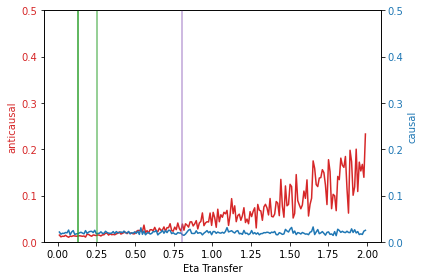

----------------------------------Experiment 2-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.1241260813562513 
 epsilon Transfer: 0.1241260813562513 
 eta source: 0.24753660709226138 
 eta Transfer: 0.2956090128506667



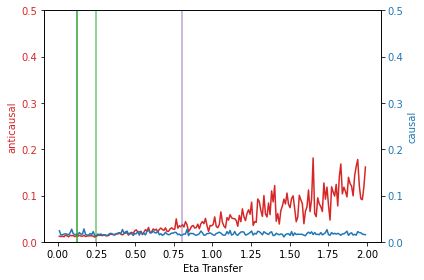

----------------------------------Experiment 3-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.07293776739046604 
 epsilon Transfer: 0.07293776739046604 
 eta source: 0.27478072241268375 
 eta Transfer: 0.37656423997864724



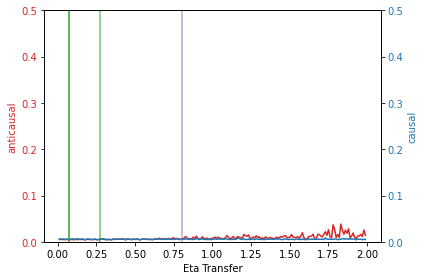

----------------------------------Experiment 4-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.12947696141024545 
 epsilon Transfer: 0.12947696141024545 
 eta source: 0.4311690928432722 
 eta Transfer: 0.06685667334020234



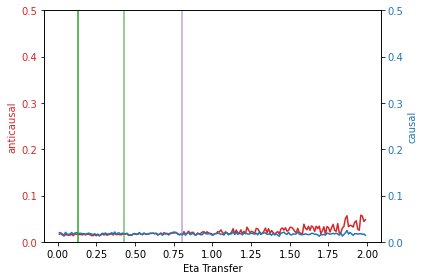

----------------------------------Experiment 5-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.04761103026412411 
 epsilon Transfer: 0.04761103026412411 
 eta source: 0.12832066331018832 
 eta Transfer: 0.014059131634706235



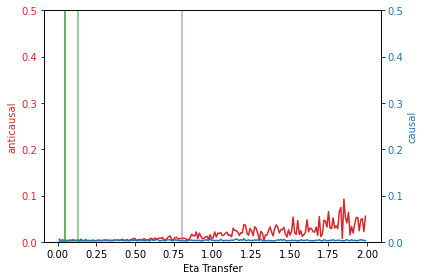

----------------------------------Experiment 6-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.1616258594899852 
 epsilon Transfer: 0.1616258594899852 
 eta source: 0.1601481714803562 
 eta Transfer: 0.14002304440892477



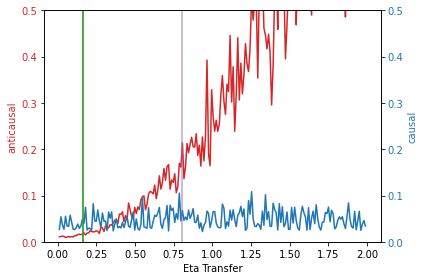

----------------------------------Experiment 7-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.1712685980618069 
 epsilon Transfer: 0.1712685980618069 
 eta source: 0.0265375967612711 
 eta Transfer: 0.015786169822110008



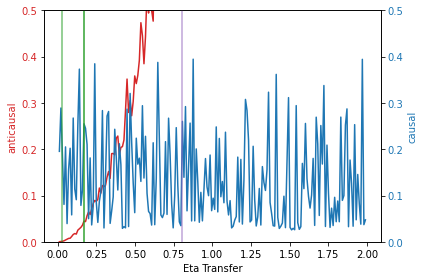

----------------------------------Experiment 8-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.22733746660030518 
 epsilon Transfer: 0.22733746660030518 
 eta source: 0.2704280359159506 
 eta Transfer: 0.4073596807107497



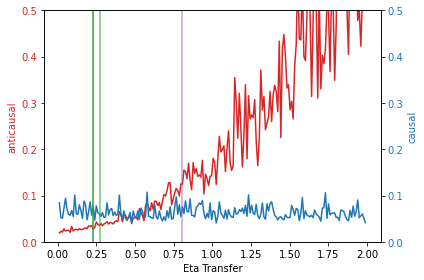

----------------------------------Experiment 9-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.18172778912021403 
 epsilon Transfer: 0.18172778912021403 
 eta source: 0.3756053262057098 
 eta Transfer: 0.22461998779437448



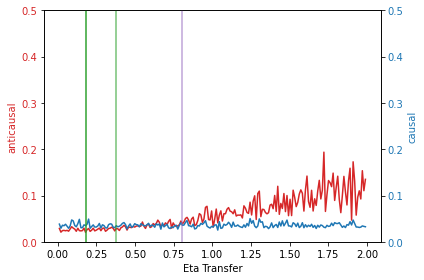

----------------------------------Experiment 10-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.1231784958711773 
 epsilon Transfer: 0.1231784958711773 
 eta source: 0.478640589943919 
 eta Transfer: 0.4739792950491191



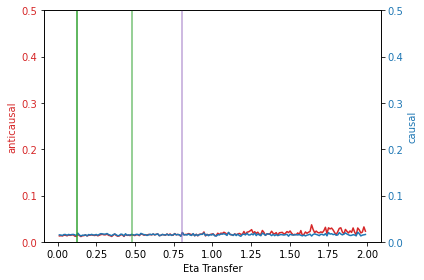

----------------------------------Experiment 11-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.014455295155788084 
 epsilon Transfer: 0.014455295155788084 
 eta source: 0.340928259861974 
 eta Transfer: 0.03331078514507074



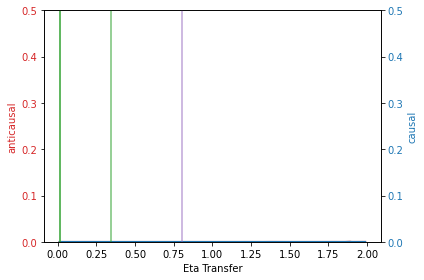

----------------------------------Experiment 12-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.1898438013185072 
 epsilon Transfer: 0.1898438013185072 
 eta source: 0.3028754200228895 
 eta Transfer: 0.24594572694784422



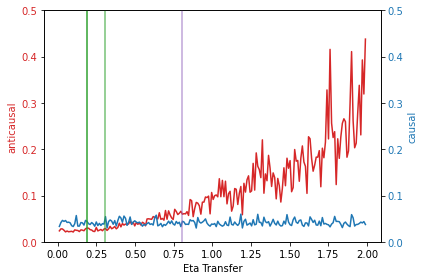

----------------------------------Experiment 13-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.11751682321288265 
 epsilon Transfer: 0.11751682321288265 
 eta source: 0.2788855469571849 
 eta Transfer: 0.4169323558252266



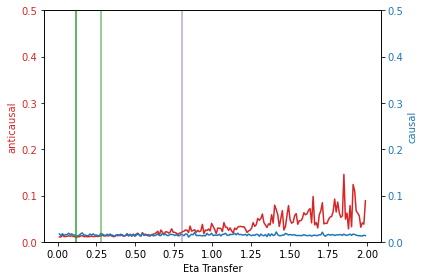

----------------------------------Experiment 14-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.20418385746992934 
 epsilon Transfer: 0.20418385746992934 
 eta source: 0.4085344917156653 
 eta Transfer: 0.47420051853645345



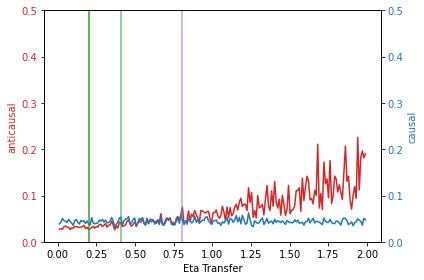

----------------------------------Experiment 15-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.3943201775098429 
 epsilon Transfer: 0.3943201775098429 
 eta source: 0.15966634295328624 
 eta Transfer: 0.33639788019574385



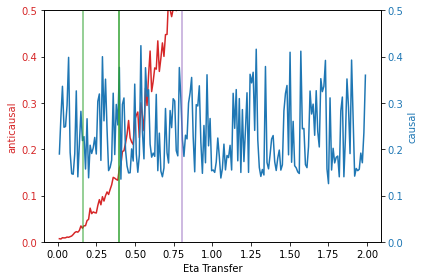

----------------------------------Experiment 16-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.15581668278652183 
 epsilon Transfer: 0.15581668278652183 
 eta source: 0.34789979041297775 
 eta Transfer: 0.3142694245195441



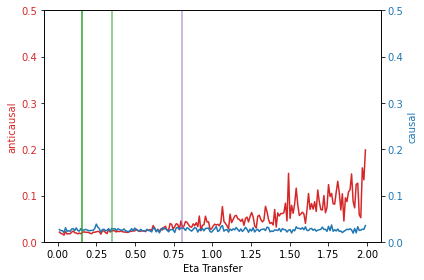

----------------------------------Experiment 17-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.4025005043172554 
 epsilon Transfer: 0.4025005043172554 
 eta source: 0.41501390510126596 
 eta Transfer: 0.38585784546131163



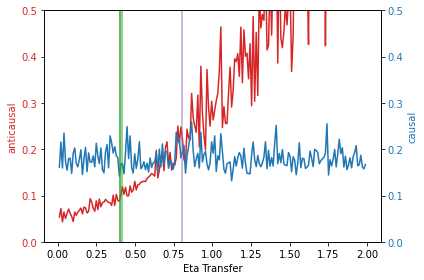

----------------------------------Experiment 18-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.04679089413971005 
 epsilon Transfer: 0.04679089413971005 
 eta source: 0.4721536971383107 
 eta Transfer: 0.46467667338863716



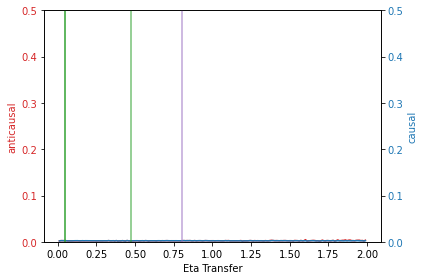

----------------------------------Experiment 19-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.11459743756123714 
 epsilon Transfer: 0.11459743756123714 
 eta source: 0.3429499826790839 
 eta Transfer: 0.1401696302805681



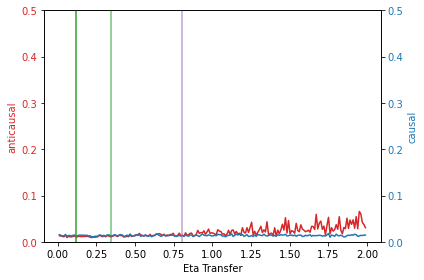

----------------------------------Experiment 20-------------------------------------
Chosen random conditions: 
 alpha: 0.5995131868582837 
 gamma: 0.8053010114245711
 epsilon source: 0.26985932282329594 
 epsilon Transfer: 0.26985932282329594 
 eta source: 0.032370495234246954 
 eta Transfer: 0.48951204780304836



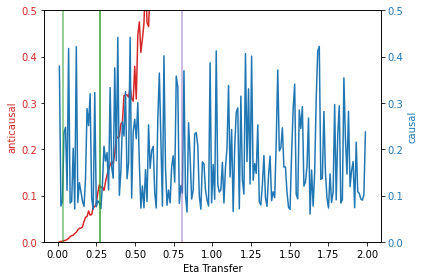

In [14]:
  # initial weights
  alpha = random.uniform(0, 1)
  gamma = random.uniform(0, 1)
  etas = np.linspace(0.01, 1.99, num=200)
  for i in range(20): 
    print('----------------------------------Experiment {0}-------------------------------------'.format(i+1))
    runExperiment(alpha, gamma, etas)

  We notice that our mathematical relation holds true; when the eta_transfer gets larger, the anticausal error increases and the causal model becomes better. But in general, if we keep the exogenous factors' influence small, hte anticausal model behaves better than the causal model.  